In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython
import os
import noisereduce as nr
from noisereduce.noisereduce import SpectralGateStationary

In [56]:
audio_file = "whale_data/data/train/train6.aiff"

In [57]:
data, sr = librosa.load(audio_file)


In [58]:
IPython.display.Audio(data=data,rate=sr)

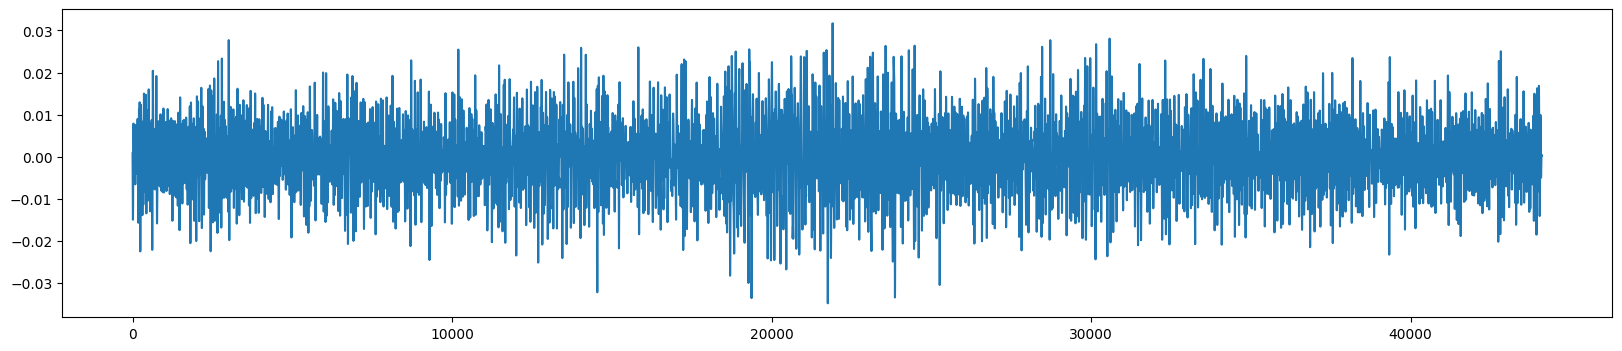

In [59]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(data)

In [60]:
import torch
from noisereduce.torchgate import TorchGate as TG
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


In [61]:
def reduce_with_nf(data):
    reduced_noise = nr.reduce_noise(y=data, sr=sr)
    return reduced_noise

def reduce_with_torch(data):
    tg = TG(sr=sr, nonstationary=False)
    data = data.reshape((1,data.shape[0]))
    denoised = tg(torch.from_numpy(data))
    denoised = np.array(denoised)
    denoised = denoised.reshape((denoised.shape[1],))
    return denoised


In [62]:
reduced = reduce_with_nf(data)
IPython.display.Audio(data=reduced,rate=sr)

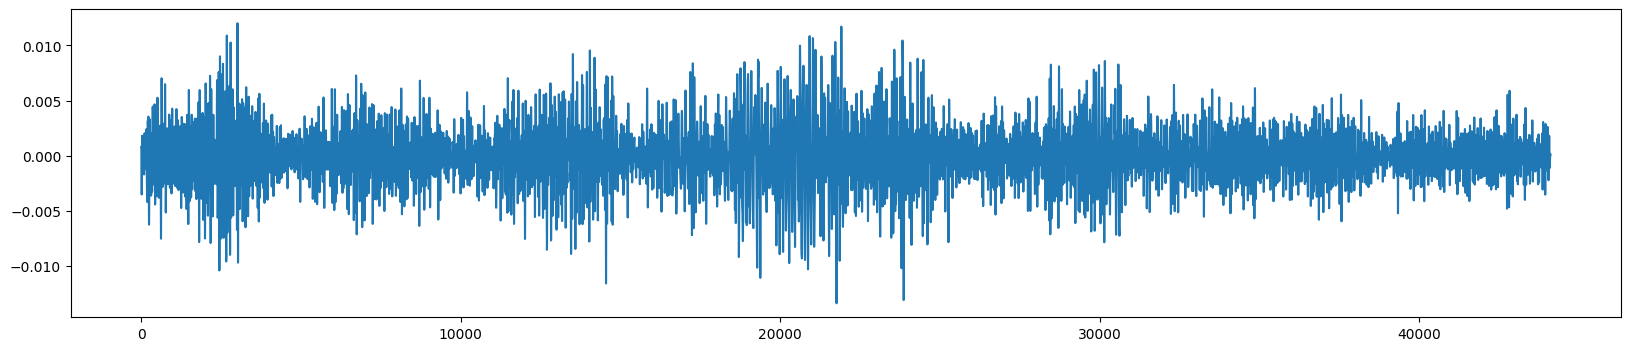

In [63]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(reduced)

In [64]:
denoised = reduce_with_torch(data)
IPython.display.Audio(data=denoised,rate=sr)

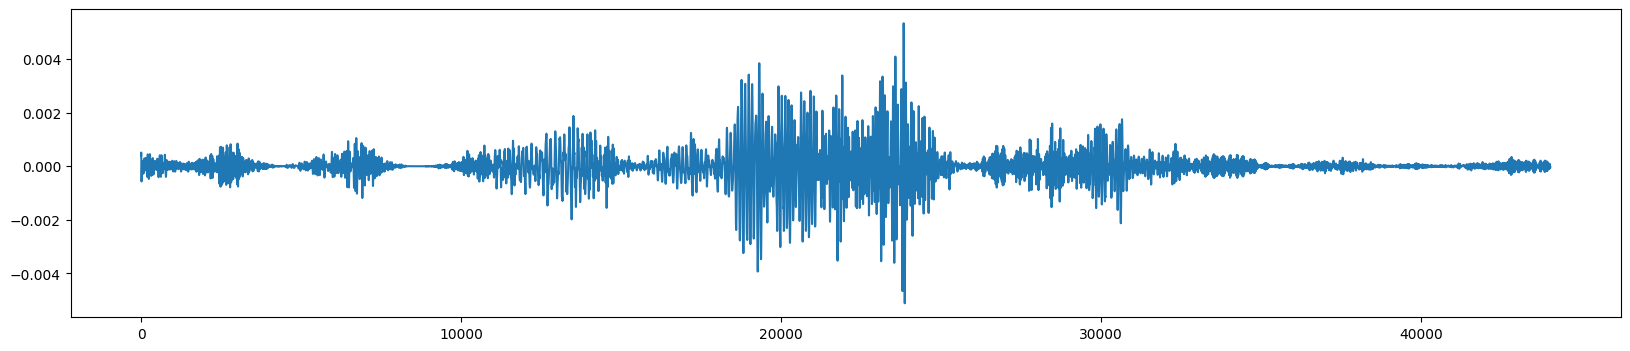

In [65]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(denoised)

In [66]:
reduced_then_denoised = reduce_with_torch(reduced)
IPython.display.Audio(data=reduced_then_denoised,rate=sr)

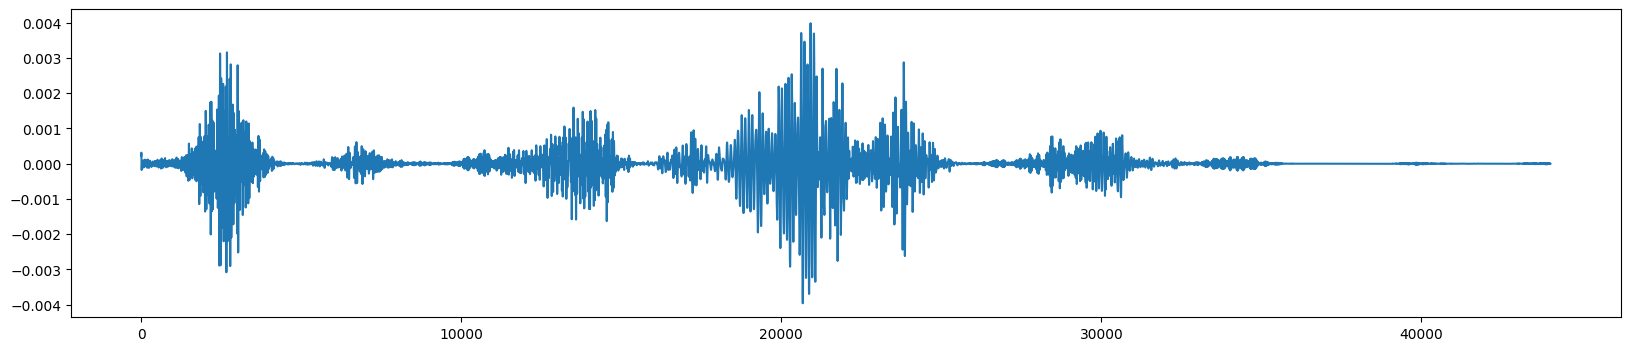

In [67]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(reduced_then_denoised)

In [68]:
denoised_then_reduced = reduce_with_nf(denoised)
IPython.display.Audio(data=denoised_then_reduced,rate=sr)

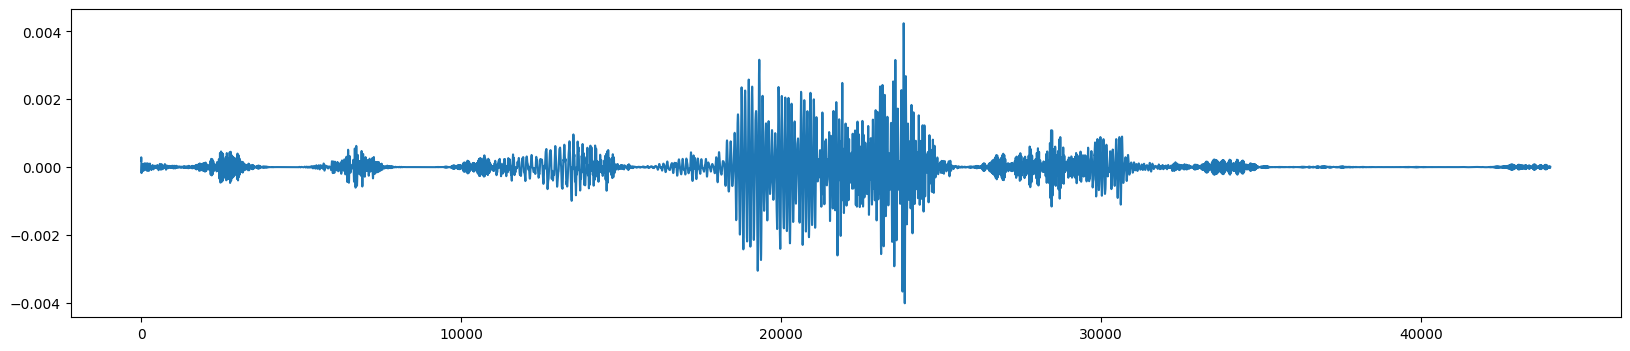

In [69]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(denoised_then_reduced)

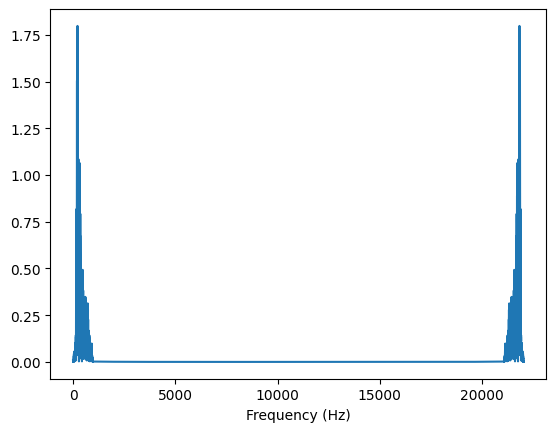

In [71]:
whale_call_fft = np.abs(np.fft.fft(denoised_then_reduced))
frequency = np.linspace(0,sr, len(whale_call_fft))
plt.plot(frequency,whale_call_fft)
plt.xlabel("Frequency (Hz)")
plt.show()